In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [4]:
from keras.preprocessing.text import Tokenizer

In [5]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)

In [6]:
vocab_length = len(word_tokenizer.word_index) + 1

In [7]:
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)
print(embedded_sentences)

[[14, 3, 15, 16, 1], [4, 17, 6, 9, 5, 7, 2], [18, 19, 20, 2, 3, 21], [22, 23], [24, 25, 26, 27, 5, 7, 2], [28, 8, 9, 29], [30, 31, 32, 8, 33, 1], [2, 3, 8, 34, 1], [10, 11], [35, 36, 37], [12, 38], [2, 6, 39, 40], [5, 41, 13, 7, 4, 1], [4, 1, 6, 10], [5, 42, 13, 43], [4, 11, 3, 12]]


In [8]:
from nltk.tokenize import word_tokenize

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[14  3 15 16  1  0  0]
 [ 4 17  6  9  5  7  2]
 [18 19 20  2  3 21  0]
 [22 23  0  0  0  0  0]
 [24 25 26 27  5  7  2]
 [28  8  9 29  0  0  0]
 [30 31 32  8 33  1  0]
 [ 2  3  8 34  1  0  0]
 [10 11  0  0  0  0  0]
 [35 36 37  0  0  0  0]
 [12 38  0  0  0  0  0]
 [ 2  6 39 40  0  0  0]
 [ 5 41 13  7  4  1  0]
 [ 4  1  6 10  0  0  0]
 [ 5 42 13 43  0  0  0]
 [ 4 11  3 12  0  0  0]]


In [9]:
from numpy import array
from numpy import asarray
from numpy import zeros
import warnings
warnings.filterwarnings('ignore')
import gensim

In [10]:
WORD2VEC_MODEL = "dataset\model_1_lac.bin"
#load word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True, limit=100000)

In [18]:
print(len(word2vec["good"]))

300


In [19]:
import numpy as np
vocab_size = 100000
embedding_dim = 300
max_length = 324
word_index = word_tokenizer.word_index

In [20]:
word_index = word_tokenizer.word_index

In [21]:
embedding_weights = np.zeros((44, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index] = word2vec[word]
    except:
        pass 
    
    
# for word, index in word_index.items():
#     try:
#         embedding_weights[index, :] = word2vec[word]
#     except:
#         pass

In [56]:
print(embedding_weights[1])

[ 0.17480469 -0.10986328 -0.20019531  0.26757812 -0.06396484  0.06689453
  0.07958984  0.08398438  0.12695312  0.11621094  0.11523438 -0.13867188
 -0.08203125 -0.00143433 -0.19824219  0.13574219 -0.03955078  0.06933594
 -0.2265625  -0.20019531  0.03076172  0.16015625 -0.04174805  0.00427246
  0.09619141 -0.03320312  0.02783203  0.02124023  0.13867188 -0.02075195
 -0.31835938 -0.08837891 -0.23828125  0.02490234  0.06787109 -0.18066406
  0.27148438  0.16210938  0.04614258  0.20410156  0.22949219 -0.03710938
  0.140625    0.12890625 -0.22558594  0.03857422 -0.01300049  0.00582886
  0.23144531  0.1015625  -0.10351562 -0.10351562 -0.2578125   0.16503906
  0.03686523 -0.32421875  0.02893066 -0.11914062 -0.19238281  0.00086594
  0.06591797  0.265625   -0.15917969  0.26171875 -0.18359375  0.13085938
 -0.25       -0.05541992  0.27929688 -0.06103516 -0.05322266  0.07470703
 -0.24609375  0.203125   -0.23925781  0.00634766  0.10742188  0.0324707
  0.19921875  0.0456543  -0.04052734 -0.11181641 -0.

In [25]:
model = Sequential()
embedding_layer = Embedding(vocab_length, 300, weights=[embedding_weights], input_length=length_long_sentence, trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 7, 300)            13200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2100)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2101      
Total params: 15,301
Trainable params: 2,101
Non-trainable params: 13,200
_________________________________________________________________
None


In [27]:
sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [35]:
model.fit(padded_sentences, sentiments, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 250us/step - loss: 0.5176 - acc: 1.0000
Epoch 2/100
16/16 [==============================] - 0s 250us/step - loss: 0.5021 - acc: 1.0000
Epoch 3/100
16/16 [==============================] - 0s 250us/step - loss: 0.4871 - acc: 1.0000
Epoch 4/100
16/16 [==============================] - 0s 407us/step - loss: 0.4726 - acc: 1.0000
Epoch 5/100
16/16 [==============================] - 0s 157us/step - loss: 0.4586 - acc: 1.0000
Epoch 6/100
16/16 [==============================] - 0s 157us/step - loss: 0.4451 - acc: 1.0000
Epoch 7/100
16/16 [==============================] - 0s 94us/step - loss: 0.4320 - acc: 1.0000
Epoch 8/100
16/16 [==============================] - 0s 250us/step - loss: 0.4193 - acc: 1.0000
Epoch 9/100
16/16 [==============================] - 0s 0us/step - loss: 0.4072 - acc: 1.0000
Epoch 10/100
16/16 [==============================] - 0s 0us/step - loss: 0.3954 - acc: 1.0000
Epoch 11/100
16/16 [========================

Epoch 86/100
16/16 [==============================] - 0s 250us/step - loss: 0.0835 - acc: 1.0000
Epoch 87/100
16/16 [==============================] - 0s 500us/step - loss: 0.0824 - acc: 1.0000
Epoch 88/100
16/16 [==============================] - 0s 0us/step - loss: 0.0813 - acc: 1.0000
Epoch 89/100
16/16 [==============================] - 0s 0us/step - loss: 0.0803 - acc: 1.0000
Epoch 90/100
16/16 [==============================] - 0s 125us/step - loss: 0.0792 - acc: 1.0000
Epoch 91/100
16/16 [==============================] - 0s 157us/step - loss: 0.0782 - acc: 1.0000
Epoch 92/100
16/16 [==============================] - 0s 157us/step - loss: 0.0772 - acc: 1.0000
Epoch 93/100
16/16 [==============================] - 0s 157us/step - loss: 0.0762 - acc: 1.0000
Epoch 94/100
16/16 [==============================] - 0s 63us/step - loss: 0.0753 - acc: 1.0000
Epoch 95/100
16/16 [==============================] - 0s 250us/step - loss: 0.0743 - acc: 1.0000
Epoch 96/100
16/16 [===============

In [36]:
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [49]:
pre = ['pathetic picture']
pre_sequences = word_tokenizer.texts_to_sequences(pre)
pre_padded = pad_sequences(pre_sequences,maxlen=length_long_sentence, truncating='post')
prediction = model.predict(pre_padded)
prediction

array([[0.8297338]], dtype=float32)

In [50]:
from keras.models import Model
from keras.layers import Input

deep_inputs = Input(shape=(length_long_sentence,))
embedding = Embedding(vocab_length, 300, weights=[embedding_weights], input_length=length_long_sentence, trainable=False)(deep_inputs) # line A
flatten = Flatten()(embedding)
hidden = Dense(1, activation='sigmoid')(flatten)
model = Model(inputs=deep_inputs, outputs=hidden)

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 7, 300)            13200     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2100)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2101      
Total params: 15,301
Trainable params: 2,101
Non-trainable params: 13,200
_________________________________________________________________
None


In [64]:
history = model.fit(padded_sentences, sentiments, epochs=100, verbose=1)
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)

print('Accuracy: %f' % (accuracy*100))

Epoch 1/100
16/16 [==============================] - 0s 250us/step - loss: 0.0780 - acc: 1.0000
Epoch 2/100
16/16 [==============================] - 0s 250us/step - loss: 0.0770 - acc: 1.0000
Epoch 3/100
16/16 [==============================] - 0s 0us/step - loss: 0.0760 - acc: 1.0000
Epoch 4/100
16/16 [==============================] - 0s 0us/step - loss: 0.0751 - acc: 1.0000
Epoch 5/100
16/16 [==============================] - 0s 250us/step - loss: 0.0741 - acc: 1.0000
Epoch 6/100
16/16 [==============================] - 0s 250us/step - loss: 0.0732 - acc: 1.0000
Epoch 7/100
16/16 [==============================] - 0s 250us/step - loss: 0.0723 - acc: 1.0000
Epoch 8/100
16/16 [==============================] - 0s 250us/step - loss: 0.0714 - acc: 1.0000
Epoch 9/100
16/16 [==============================] - 0s 0us/step - loss: 0.0706 - acc: 1.0000
Epoch 10/100
16/16 [==============================] - 0s 0us/step - loss: 0.0697 - acc: 1.0000
Epoch 11/100
16/16 [===========================

Epoch 86/100
16/16 [==============================] - 0s 250us/step - loss: 0.0341 - acc: 1.0000
Epoch 87/100
16/16 [==============================] - 0s 250us/step - loss: 0.0339 - acc: 1.0000
Epoch 88/100
16/16 [==============================] - 0s 250us/step - loss: 0.0336 - acc: 1.0000
Epoch 89/100
16/16 [==============================] - 0s 250us/step - loss: 0.0334 - acc: 1.0000
Epoch 90/100
16/16 [==============================] - 0s 250us/step - loss: 0.0331 - acc: 1.0000
Epoch 91/100
16/16 [==============================] - 0s 250us/step - loss: 0.0329 - acc: 1.0000
Epoch 92/100
16/16 [==============================] - 0s 250us/step - loss: 0.0326 - acc: 1.0000
Epoch 93/100
16/16 [==============================] - 0s 250us/step - loss: 0.0324 - acc: 1.0000
Epoch 94/100
16/16 [==============================] - 0s 250us/step - loss: 0.0322 - acc: 1.0000
Epoch 95/100
16/16 [==============================] - 0s 219us/step - loss: 0.0319 - acc: 1.0000
Epoch 96/100
16/16 [==========

In [65]:
pre = ['The acting is pathetic']
pre_sequences = word_tokenizer.texts_to_sequences(pre)
pre_padded = pad_sequences(pre_sequences,maxlen=length_long_sentence, truncating='post')
prediction = model.predict(pre_padded)
prediction

array([[0.80587614]], dtype=float32)

KeyError: 'val_acc'

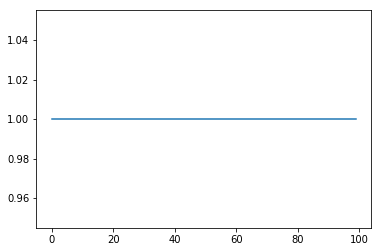

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [82]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [83]:
sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(corpus, sentiments, test_size=0.20, random_state=42)

In [85]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [74]:
model = Sequential()

embedding_layer = Embedding(vocab_length, 300, weights=[embedding_weights], input_length=length_long_sentence , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [75]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 7, 300)            13200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 128)            192128    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 205,457
Trainable params: 192,257
Non-trainable params: 13,200
_________________________________________________________________
None


In [76]:
history = model.fit(X_train, y_train, batch_size=12, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

NameError: name 'X_train' is not defined